In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

from adaboost import adaboost

plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.size': 8})

In [2]:
path = "toy.txt"

D = np.loadtxt(path)
labels = D[:,0].copy() # copy is needed, otherwise next line will mess up the splice
D[:,0] = 1 # replace the label column of D with constant, now the first feature gives us the bias term

# 1. Plot line

In [3]:
itercnt = 100

output, err_individual, err_ensemble, err_exponential = adaboost(D, labels, itercnt)

In [4]:
df = pd.DataFrame({
    'iteration': range(1, 101,),
    'err_individual': err_individual,
    'err_ensemble': err_ensemble,
    'err_exponential': err_exponential,
})

df.head()

,iteration,err_individual,err_ensemble,err_exponential
0,1,0.202000,0.202,0.802984
1,2,0.324437,0.202,0.751857
2,3,0.370549,0.202,0.726222
3,4,0.299514,0.202,0.665285
4,5,0.324057,0.204,0.622735


Text(0, 0.5, 'Normalized exponential loss')

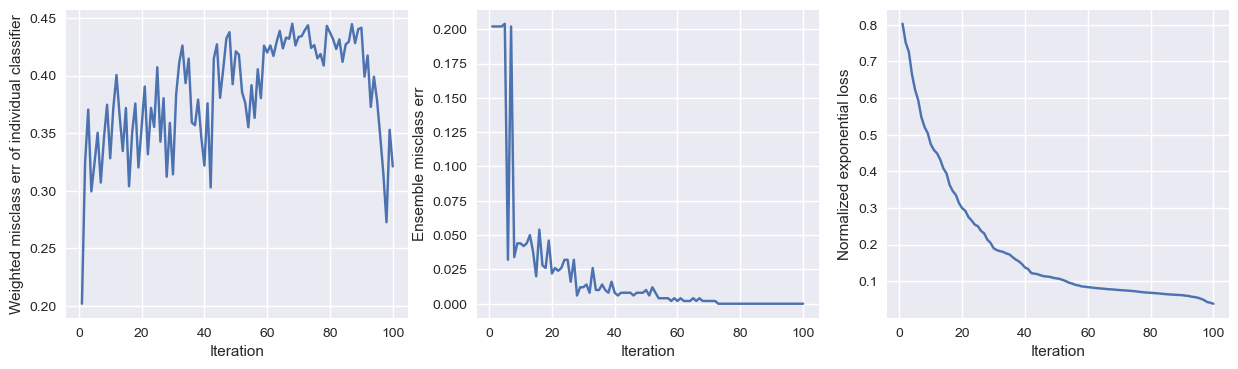

In [5]:
fig = plt.figure(figsize=(15, 4))

ax = fig.add_subplot(1, 3, 1)
sns.lineplot(data=df, x='iteration', y='err_individual', ax=ax)
ax.set_xlabel("Iteration")
ax.set_ylabel("Weighted misclass err of individual classifier")

ax = fig.add_subplot(1, 3, 2)
sns.lineplot(data=df, x='iteration', y='err_ensemble', ax=ax)
ax.set_xlabel("Iteration")
ax.set_ylabel("Ensemble misclass err")

ax = fig.add_subplot(1, 3, 3)
sns.lineplot(data=df, x='iteration', y='err_exponential', ax=ax)
ax.set_xlabel("Iteration")
ax.set_ylabel("Normalized exponential loss")

# 2. Plot scatter

In [11]:
def plot_scatter(itercnt: int, D: np.ndarray, labels: np.ndarray):
    output, _, _, _ = adaboost(D, labels, itercnt)

    df_1 = pd.DataFrame({
        'feat1': D[:, 1],
        'feat2': D[:, 2],
        'y': labels,
        'color': ['green']*len(labels)
    })

    df_2 = pd.DataFrame({
        'feat1': D[:, 1],
        'feat2': D[:, 2],
        'y':  np.sign(output),
        'color': ['red']*len(labels)
    })
    df_2 = df_2[df_2['y'] != labels]

    df_plot = pd.concat([df_1, df_2])

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')
    # ax.set_title(f"Target and Misclassification as num. iter = {itercnt}")

    # ax.scatter(D[:, 1], D[:, 2], labels, c='green')
    ax.scatter(df_plot['feat1'], df_plot['feat2'], df_plot['y'], c=df_plot['color'])

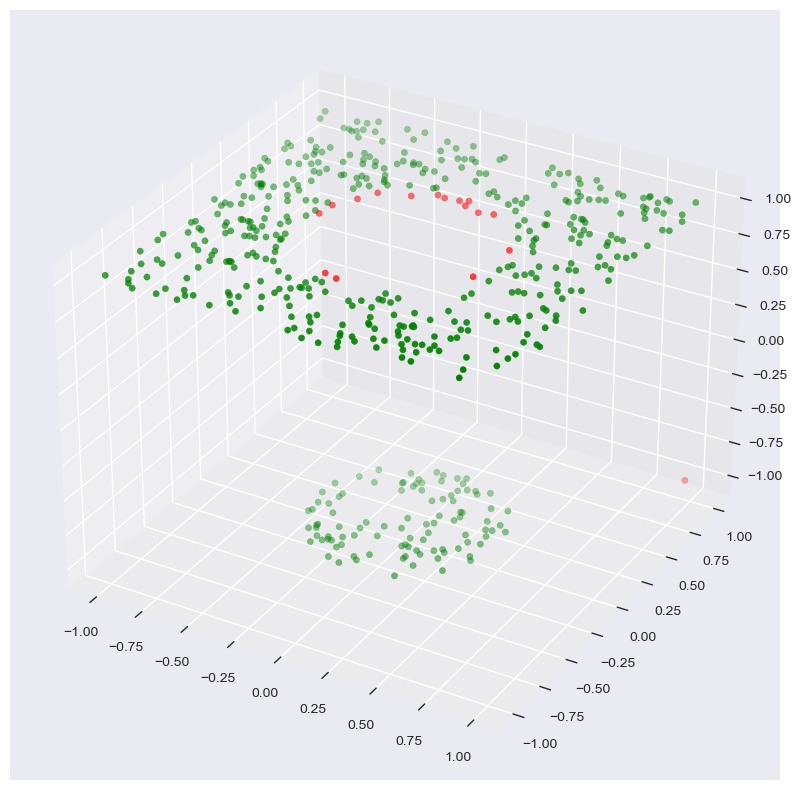

In [12]:
plot_scatter(8, D, labels)

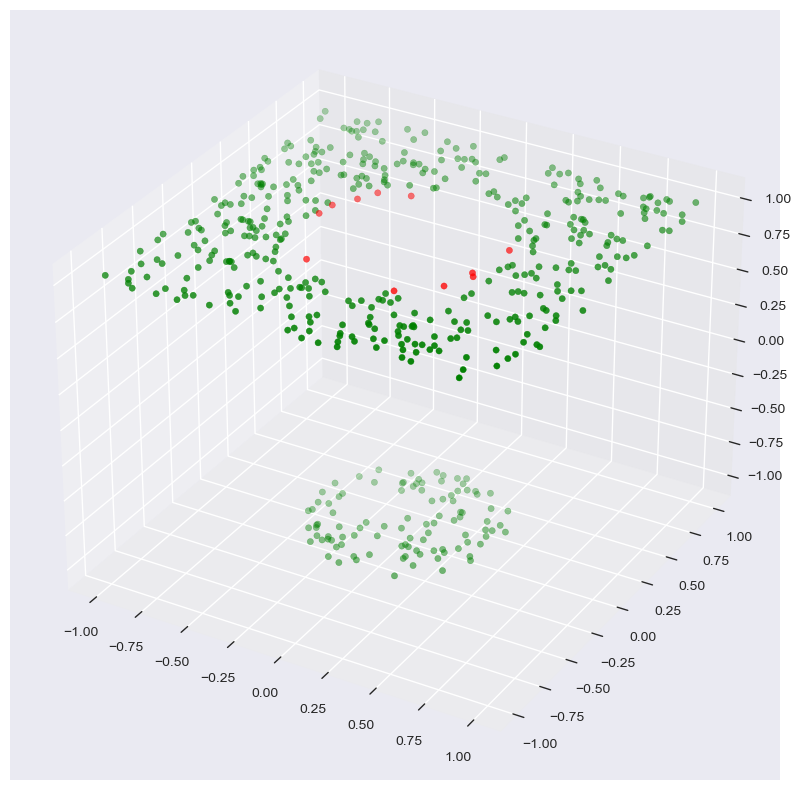

In [13]:
plot_scatter(20, D, labels)

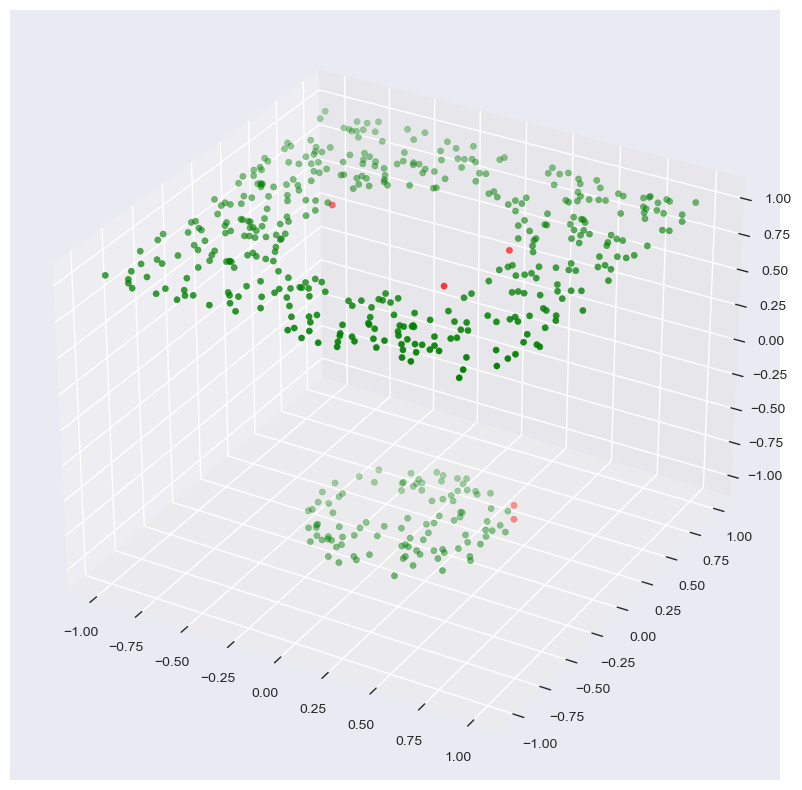

In [14]:
plot_scatter(50, D, labels)

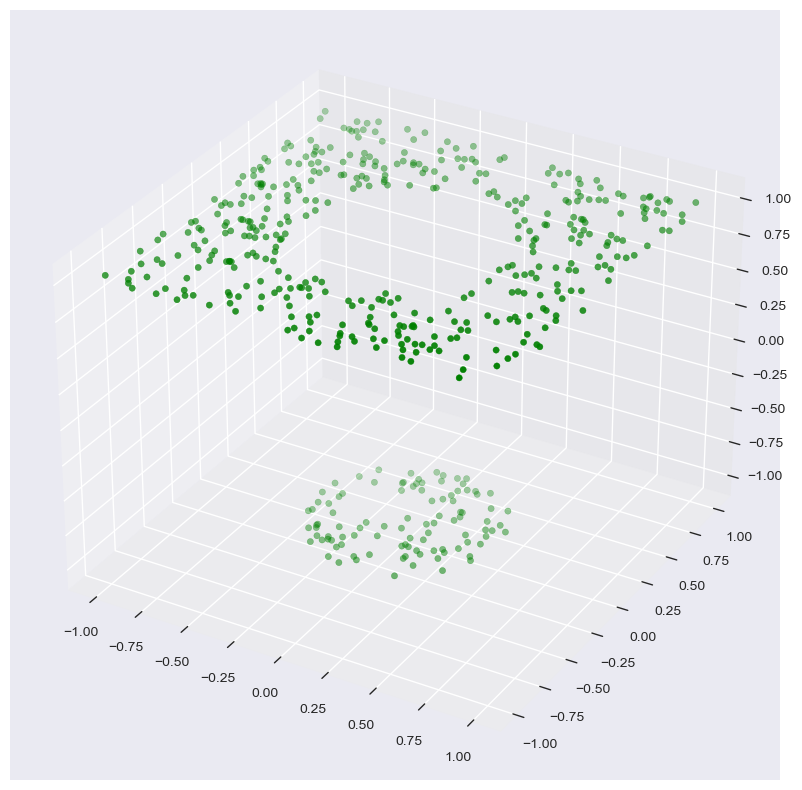

In [15]:
plot_scatter(100, D, labels)